In [9]:
# The correlation factor can be used to find the relation between the independent variable and the target variable. 
# Below python code demonstrates the usage of correlation factors in determining the dependence 
# between the independent variable and the target variable using auto-car data set. 
# It has 9 features among which ‘mpg’ is the target variable. 
# The correlation coefficient between ‘mpg’ and the remaining 8 variables is determined. 
# Then the features according to their correlation coefficient are sorted. 
# The features with a correlation coefficient > 0.5 are selected as they are significant in predicting the target variable. 

In [13]:
from sklearn.preprocessing import LabelEncoder
from IPython.display import display 
import pandas as pd
cardata= pd.read_csv(r"E:\ML-2024-25\Feature Engineering -Data Sets\Data\auto-mpg.csv")

In [ ]:
# this dataset has 9 features and 398 records
cardata.shape

In [ ]:
#Print two rows to see the dataset entries
print('-------------------------------------------------')
print('               DATA SET            ')
print('-------------------------------------------------')
display(cardata.head(2))

In [ ]:
# describe function gives the details of only numeric fatures
cardata.describe()
# what happend to the features horsepower and car name?

In [ ]:
#print a concise summary of a DataFrame
print('SUMMARY OF THE DATASET')
print('-------------------------------------------------')
cardata.info()
print('-------------------------------------------------')
# from the output it can be observed that horsepower and car name of are type object

In [ ]:
#####################################
#convert Object datatypt to numeric datatype
#####################################
# Syntax : pandas.to_numeric(arg, errors='raise', downcast=None, dtype_backend=_NoDefault.no_default)
# Returns: ret Numeric if parsing succeeded. Return type depends on input. Series if Series, otherwise ndarray

#parametrs:
# arg: scalar, list, tuple, 1-d array, or Series

# errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
# If ‘raise’, then invalid parsing will raise an exception.
# If ‘coerce’, then invalid parsing will be set as NaN.
# If ‘ignore’, then invalid parsing will return the input

#downcast  : str, default None
# Can be ‘integer’, ‘signed’, ‘unsigned’, or ‘float’. 
# If not None, and if the data has been successfully cast to a numerical dtype (or if the data was numeric to begin with), 
# downcast that resulting data to the smallest numerical dtype 

#dtype_backend : default ‘numpy_nullable’
 # "numpy_nullable": returns nullable-dtype-backed DataFrame (default).
# otherwise , returns nullable ArrowDtype DataFrame.


In [14]:
#####################################
#convert Object datatypt to numeric datatype
#####################################
cardata['horsepower'] = pd.to_numeric(cardata['horsepower'], errors='coerce').fillna(0).astype(int)
print('SUMMARY OF THE DATASET AFTER DATATYPE CONVERSION')
print('-------------------------------------------------')
cardata.info()
print('-------------------------------------------------')

SUMMARY OF THE DATASET AFTER DATATYPE CONVERSION
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.6+ KB
-------------------------------------------------


In [15]:
#####################################
# Encode catergorical variable
#####################################
carname= cardata.iloc[:, 8].values
labelencoder = LabelEncoder()
carname= labelencoder.fit_transform(carname)

In [16]:
X= cardata.iloc[:,1:8]
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [17]:
############################
# generating the data with encoded variable
#########################
target=cardata.iloc[:,0].values
X=cardata.iloc[:,0:8]
X['car name'] = carname
X['mpg'] = target
display(X.head(2))
#####################################

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,49
1,15.0,8,350.0,165,3693,11.5,70,1,36


In [18]:
# Find the features that are  correlated with the target variable
#####################################
Impfeatures = X.drop("mpg", axis=1).apply(lambda x: x.corr(X.mpg))
Impfeatures

cylinders      -0.775396
displacement   -0.804203
horsepower     -0.754276
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
car name        0.273936
dtype: float64

In [19]:
# Find the features that are  correlated with the target variable
#####################################
import numpy as np
indices = np.argsort(Impfeatures)
print(Impfeatures[indices])   


weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
horsepower     -0.754276
car name        0.273936
acceleration    0.420289
origin          0.563450
model year      0.579267
dtype: float64


C:\Users\Sirisha Alamanda\AppData\Local\Temp\ipykernel_16828\3324559945.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(Impfeatures[indices])


C:\Users\Sirisha Alamanda\AppData\Local\Temp\ipykernel_16828\2473931056.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(range(len(indices)), Impfeatures[indices], color='b', align='center')


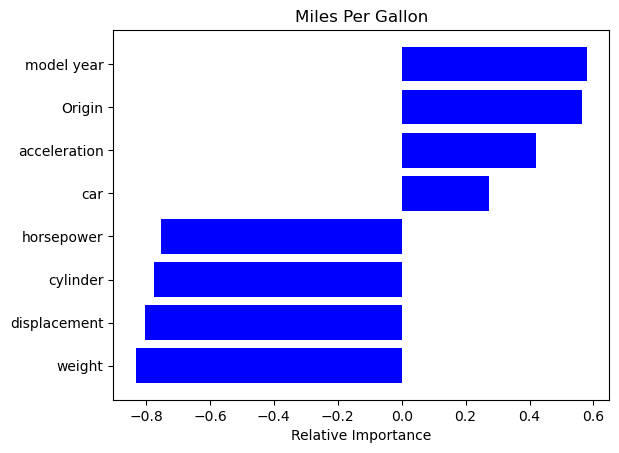

In [22]:
#####################################
# Visualize the features
#####################################
import matplotlib.pyplot as plt
names=['cylinder','displacement','horsepower','weight','acceleration','model year', 'Origin', 'car']
plt.title('Miles Per Gallon')
plt.barh(range(len(indices)), Impfeatures[indices], color='b', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [23]:
#####################################
#The features with a correlation coefficient > 0.5 are selected as they are significant in predicting the target variable. 
# Display the list of Important features 
#####################################
print('-----------------------------------------------')
print('LIST OF IMPORTANT FEATURES')
print('-----------------------------------------------')
for i in range(0, len(indices)):
    if np.abs(Impfeatures[i])>0.5:
        print(names[i]) 

-----------------------------------------------
LIST OF IMPORTANT FEATURES
-----------------------------------------------
cylinder
displacement
horsepower
weight
model year
Origin


C:\Users\Sirisha Alamanda\AppData\Local\Temp\ipykernel_16828\2681036811.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.abs(Impfeatures[i])>0.5:
